TREINAMENTO DO MODELO DE DETECÇÃO DE LETRAS EM LIBAS

In [21]:
# IMPORT
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [22]:
# Parâmetros
IMAGE_WIDTH, IMAGE_HEIGHT = 32, 32
BATCH_SIZE = 32
EPOCHS = 20
DATASET_DIR = "../dataset"

# Gerador de dados
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255
)

# Dados de treino
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training'
)

# Dados de validação
val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation'
)

# Mapeamento das classes (letras)
class_indices = train_generator.class_indices
print("Mapeamento das classes:", class_indices)

Found 977 images belonging to 12 classes.
Found 240 images belonging to 12 classes.
Mapeamento das classes: {'a': 0, 'b': 1, 'c': 2, 'l': 3, 'm': 4, 'n': 5, 'o': 6, 'q': 7, 's': 8, 'u': 9, 'v': 10, 'w': 11}


In [23]:
# Salvar mapeamento para uso posterior
import json
with open('../models/class_indices.json', 'w') as f:
    json.dump(class_indices, f)

In [24]:
# Modelo CNN simples
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,980 (1.21 MB)

 Trainable params: 315,980 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.3541 - loss: 1.9744 - val_accuracy: 0.9000 - val_loss: 0.4532
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8483 - loss: 0.4150 - val_accuracy: 0.9375 - val_loss: 0.2065
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9506 - loss: 0.1730 - val_accuracy: 0.9667 - val_loss: 0.1501
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9661 - loss: 0.1226 - val_accuracy: 0.8958 - val_loss: 0.2380
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9756 - loss: 0.0765 - val_accuracy: 0.9708 - val_loss: 0.1302
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9821 - loss: 0.0540 - val_accuracy: 0.9875 - val_loss: 0.0645
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9766 - loss: 0.0667 - val_accuracy: 0.9667 - val_loss: 0.1308
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9802 - loss: 0.0421 - val_accuracy: 0.970

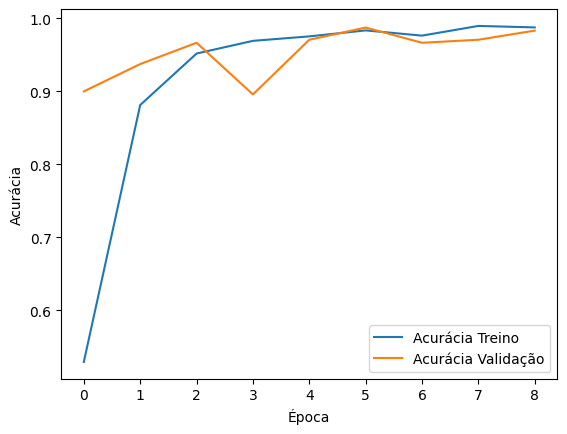

In [25]:
# Treinamento com early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

# Plot dos resultados
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [26]:
# Salva o modelo treinado
model.save('../models/asl_gesture_model2.h5')
print("Modelo salvo como 'asl_gesture_model2.h5'")

Modelo salvo como 'asl_gesture_model2.h5'
